In [1]:
from os.path import join

from openscm.units import unit_registry
from openscm.highlevel import OpenSCMDataFrame, run

<IPython.core.display.Javascript object>

In [2]:
import matplotlib
%matplotlib inline

In [3]:
DATA_PATH = join("..", "data", "rcps")

In [4]:
rcp26 = OpenSCMDataFrame(join(DATA_PATH, "rcp26_emissions.csv"))
rcp26.head()

INFO:root:Reading `../data/rcps/rcp26_emissions.csv`


,model,scenario,region,variable,unit,climate_model,todo,time,value
0,IMAGE,RCP26,World,Emissions|BC,Mt BC / yr,unspecified,SET,1765-07-12 00:00:00,0.000000
39,IMAGE,RCP26,World,Emissions|BC,Mt BC / yr,unspecified,SET,1766-07-12 00:00:00,0.106998
78,IMAGE,RCP26,World,Emissions|BC,Mt BC / yr,unspecified,SET,1767-07-12 00:00:00,0.133383
117,IMAGE,RCP26,World,Emissions|BC,Mt BC / yr,unspecified,SET,1768-07-12 00:00:00,0.159847
156,IMAGE,RCP26,World,Emissions|BC,Mt BC / yr,unspecified,SET,1769-07-12 00:00:00,0.186393


In [5]:
rcps = OpenSCMDataFrame(rcp26.data.copy())  # TODO: add copy method to IamDataFrame
for rcp in ["rcp45", "rcp60", "rcp85"]:
    rcps.append(
        join(DATA_PATH, "{}_emissions.csv".format(rcp)),
        inplace=True
    )

INFO:root:Reading `../data/rcps/rcp45_emissions.csv`
INFO:root:Reading `../data/rcps/rcp60_emissions.csv`
INFO:root:Reading `../data/rcps/rcp85_emissions.csv`


In [6]:
rcps.scenarios()

0    RCP26
1    RCP45
2    RCP60
3    RCP85
Name: scenario, dtype: object

In [7]:
res = run(
    rcps, 
    {
        "PH99": [
            {"beta": ("World", 0.8 * unit_registry("ppm/GtC"))},
            {"beta": ("World", 0.3 * unit_registry("ppm/GtC"))},
        ],
#         "MAGICC6": [
#             {"core_climatesensitivity": ("World", 2.0)},
#             {"core_climatesensitivity": ("World", 3.0)},
#         ]
    },
);

running PH99

running RCP26


| |                              #                    | 1 Elapsed Time: 0:00:07


running RCP45


| |                               #                   | 1 Elapsed Time: 0:00:07


running RCP60


| |                             #                     | 1 Elapsed Time: 0:00:07


running RCP85


| |                              #                    | 1 Elapsed Time: 0:00:07


In [8]:
res.head()

,model,scenario,region,variable,unit,time,climate_model,alpha (1 / a),c1 (ppm),sigma (1 / a),beta (ppm / gigatc),t1 (degc),b (ppm / a / gigatc),mu (delta_degc / a),value
0,IMAGE,RCP26,World,Atmospheric Concentrations|CO2,ppm,1765-07-12 00:00:00,PH99,0.017,290.0,0.0215,0.8,14.6,0.00151,0.087,290.000000
1,IMAGE,RCP26,World,Atmospheric Concentrations|CO2,ppm,1766-07-12 05:48:45,PH99,0.017,290.0,0.0215,0.8,14.6,0.00151,0.087,290.004645
2,IMAGE,RCP26,World,Atmospheric Concentrations|CO2,ppm,1767-07-12 11:37:30,PH99,0.017,290.0,0.0215,0.8,14.6,0.00151,0.087,290.013470
3,IMAGE,RCP26,World,Atmospheric Concentrations|CO2,ppm,1768-07-11 17:26:15,PH99,0.017,290.0,0.0215,0.8,14.6,0.00151,0.087,290.026392
4,IMAGE,RCP26,World,Atmospheric Concentrations|CO2,ppm,1769-07-11 23:15:00,PH99,0.017,290.0,0.0215,0.8,14.6,0.00151,0.087,290.043332


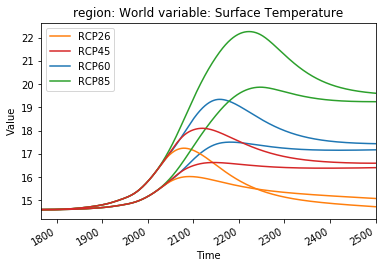

In [9]:
res.filter(
    variable="Surface Temperature",
    region="World",
).line_plot(x="time", color="scenario");

In [10]:
res.meta

,,exclude
model,scenario,
AIM,RCP60,False
IMAGE,RCP26,False
MESSAGE,RCP85,False
MiniCAM,RCP45,False
